In [136]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import math
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import pandas as pd
import numpy as np
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
import pandas as pd
from torch.autograd import Variable
import numpy as np
import torch.functional as F
from   sklearn.preprocessing   import LabelEncoder          # кодировка категорий
from   sklearn.decomposition import PCA
from   sklearn import linear_model
import matplotlib.pyplot as plt                   # постороение графиков
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset

In [137]:
# Читаем файл с компетенциями
df = pd.read_excel('/content/Dataset_L_4_25_diff_4_COLAB.xlsx')

In [138]:
df['SKILLS'] = df['SKILLS'].astype(str)

# Длинна каждого посчитаем длинну
df['list_of_skill'] = df['SKILLS'].apply(lambda x: x.split(','))

In [139]:
df['cnt_skill'] = df['list_of_skill'].apply(lambda x: len(x))

In [140]:
df.head(5)

,SKILLS,list_of_skill,cnt_skill
0,"1С ПРЕДПРИЯТИЕ 8,ФИНАНСОВАЯ ОТЧЕТНОСТЬ,УЧЕТ ОС...","[1С ПРЕДПРИЯТИЕ 8, ФИНАНСОВАЯ ОТЧЕТНОСТЬ, УЧЕТ...",25
1,"1С ТОРГОВЛЯ,КЛИЕНТООРИЕНТИРОВАННОСТЬ,1С УПРАВЛ...","[1С ТОРГОВЛЯ, КЛИЕНТООРИЕНТИРОВАННОСТЬ, 1С УПР...",25
2,"1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ,1С БИТРИКС,CRM,B2B ПРО...","[1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ, 1С БИТРИКС, CRM, B2B...",25
3,"3D ГРАФИКА,ГРАФИЧЕСКИЙ ДИЗАЙН,ADOBE INDESIGN,В...","[3D ГРАФИКА, ГРАФИЧЕСКИЙ ДИЗАЙН, ADOBE INDESIG...",25
4,"ADOBE PHOTOSHOP,ФОТОГРАФИЯ,ДИЗАЙН,ОБРАБОТКА ИЗ...","[ADOBE PHOTOSHOP, ФОТОГРАФИЯ, ДИЗАЙН, ОБРАБОТК...",25


In [141]:
df_skill = df[(df.cnt_skill > 10) & (df.cnt_skill < 26)]

In [142]:
data = df_skill

In [143]:
len(data)

50033

In [144]:
# Создаем словарь
vocabulary = []
vocabulary.append('[PAD]')
vocabulary.append('[MASK]')
for i, row  in data.iterrows():
    for j in data["list_of_skill"][i]:
        if j not in vocabulary:
            vocabulary.append(j)
word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}
vocabulary_size = len(vocabulary)

In [145]:
vocabulary_size

22467

In [146]:
from collections import Counter

# Создадим список всех слов в списке слов
all_words = [word for sublist in data.list_of_skill for word in sublist]

# Подсчитаем количество повторений каждого слова
word_counts = Counter(all_words)

# Выведем результат
print(word_counts)

Counter({'РАБОТА В КОМАНДЕ': 17769, 'ГРАМОТНАЯ РЕЧЬ': 17009, 'ПОЛЬЗОВАТЕЛЬ ПК': 12119, 'ДЕЛОВОЕ ОБЩЕНИЕ': 9714, 'ВЕДЕНИЕ ПЕРЕГОВОРОВ': 9249, 'ТЕЛЕФОННЫЕ ПЕРЕГОВОРЫ': 8892, 'АКТИВНЫЕ ПРОДАЖИ': 8675, 'ДЕЛОВАЯ ПЕРЕПИСКА': 7988, 'НАВЫКИ ПРОДАЖ': 7120, 'ОРГАНИЗАТОРСКИЕ НАВЫКИ': 6495, 'ПОИСК И ПРИВЛЕЧЕНИЕ КЛИЕНТОВ': 6009, 'РАБОТА С БОЛЬШИМ ОБЪЕМОМ ИНФОРМАЦИИ': 5647, 'ОРИЕНТАЦИЯ НА РЕЗУЛЬТАТ': 5632, 'ГРАМОТНОСТЬ': 5589, 'ДЕЛОВАЯ КОММУНИКАЦИЯ': 5255, 'ЗАКЛЮЧЕНИЕ ДОГОВОРОВ': 5146, 'УМЕНИЕ РАБОТАТЬ В КОМАНДЕ': 4820, 'РАБОТА В УСЛОВИЯХ МНОГОЗАДАЧНОСТИ': 4548, 'ПРЯМЫЕ ПРОДАЖИ': 4142, 'КЛИЕНТООРИЕНТИРОВАННОСТЬ': 4089, 'УПРАВЛЕНИЕ ПЕРСОНАЛОМ': 3776, 'РАЗВИТИЕ ПРОДАЖ': 3771, 'АНГЛИЙСКИЙ ЯЗЫК': 3682, 'B2B ПРОДАЖИ': 3674, 'ОБУЧЕНИЕ И РАЗВИТИЕ': 3392, 'ОТВЕТСТВЕННОСТЬ': 3391, 'КОММУНИКАБЕЛЬНОСТЬ': 3350, 'ХОЛОДНЫЕ ПРОДАЖИ': 3233, 'МНОГОЗАДАЧНОСТЬ': 3070, 'ПРОВЕДЕНИЕ ПРЕЗЕНТАЦИЙ': 3063, 'CRM': 2955, '1С ПРЕДПРИЯТИЕ 8': 2896, 'ОБУЧЕНИЕ ПЕРСОНАЛА': 2874, 'УПРАВЛЕНИЕ ПРОДАЖАМИ': 2864, 'УПРАВЛЕНИЕ ПРОЕКТАМИ':

In [147]:
from collections import Counter

# Создадим список всех слов в списке слов
all_words = [word for sublist in data.list_of_skill for word in sublist]

# Подсчитаем количество повторений каждого слова
word_counts = Counter(all_words)

# Получим список слов, которые встречаются всего один раз
unique_words = [word for word, count in word_counts.items() if count == 1]

# Выведем результат
print(unique_words)

['ГОРНЫЙ ИНЖЕНЕР', 'ОГР', 'ПРОДАЖА КОМПЛЕКТУЮЩИХ', 'ОБОРУДОВАНИЕ ДЛЯ ПРОИЗВОДСТВ', 'ОБОРУДОВАНИЕ ДЛЯ ПРОИЗВОДСТВЕННЫХ ПРЕДПРИЯТИЙ', 'AGILE МЕТОДОЛОГИИ', 'ИНТЕГРАЦИОННЫЕ ПРОЕКТЫ', 'MANGO DB', 'TARGET', 'VISUAL SLAM', 'LIDAR SIGNAL PROCESSING', 'RADAR SIGNAL PROCESSING', 'CONVEX OPTIMIZATION', 'BAYESIAN METHODS', 'SIMULTANEOUS LOCALIZATION AND MAPPING', 'NEURO INSPIRED ALGORITHMS', 'BRAIN MIMETIC ALGORITHMS', 'ADVANCED COMPUTING', 'EMERGING COMPUTING', 'INNOVATIVE RESEARCH', 'EVENT BASED COMPUTING AND SENSORS', 'RESTIFY', 'THRIFT', 'AVA', 'JAGGER', 'CI CD PIPELINE ОВ', 'РАСПРЕДЕЛЕННЫЕ СУБД', 'GNU C', 'INTEL C', 'ELK EFK', 'ROUTEROS CHR', 'VCLOUD DIRECTOR', 'САМОСТОЯТЕЛЬНОСТЬ В ПРИНЯТИИ РЕШЕНИЙ', 'ВЛАДЕНИЕ ФУНДАМЕНТАЛЬНЫМИ НАВЫКАМИ И ЗНАНИЯМИ В ОБЛАСТИ АВТОМАТИЗАЦИИ', 'РОБОТЫ', 'РТС', 'РОБОТОТЕХНИЧЕСКИЕ СИСТЕМЫ', 'КОМПОНЕНТЫ И КОМПЛЕКСЫ', 'MICROSOFT BI', 'DATASTREAMING', 'REAL TIME DATABASE', 'LAMBDA', 'DATA VAULT', 'КИМБАЛЛ', 'ИНМОН', 'SERVICE ORIENTED', 'DW BI', 'КОНСТРУИРОВАНИЕ МЕБЕЛИ'

In [148]:
len(unique_words)

14239

In [149]:
## Преобразуйте объект Counter в DataFrame
#word_count_df = pd.DataFrame(list(word_counts.items()), columns=['Skill', 'Count'])

In [150]:
#word_count_df.to_excel('word_count_df.xlsx')

In [151]:
# Случайная сортировка списков
for index, row in data.iterrows():
    random.shuffle(row['list_of_skill'])

In [152]:
len_tokens = 25

In [153]:
data['list_of_skill'] = data['list_of_skill'].apply(lambda x: x + ['[PAD]' for _ in range(len_tokens - len(x))])

<ipython-input-153-653f8f11be4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['list_of_skill'] = data['list_of_skill'].apply(lambda x: x + ['[PAD]' for _ in range(len_tokens - len(x))])


In [154]:
data['target']= data['list_of_skill'].apply(lambda x: x[0])

<ipython-input-154-213780b1f4fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']= data['list_of_skill'].apply(lambda x: x[0])


In [155]:
data['seq'] = data['list_of_skill'].apply(lambda x: ['[MASK]'] + x[1:] if len(x) > 0 else [])

<ipython-input-155-725515475f96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seq'] = data['list_of_skill'].apply(lambda x: ['[MASK]'] + x[1:] if len(x) > 0 else [])


In [156]:
data

,SKILLS,list_of_skill,cnt_skill,target,seq
0,"1С ПРЕДПРИЯТИЕ 8,ФИНАНСОВАЯ ОТЧЕТНОСТЬ,УЧЕТ ОС...","[УЧЕТ ЗАПАСОВ, АДАПТИВНОЕ ПЛАНИРОВАНИЕ, ВЫСШЕЕ...",25,УЧЕТ ЗАПАСОВ,"[[MASK], АДАПТИВНОЕ ПЛАНИРОВАНИЕ, ВЫСШЕЕ ОБРАЗ..."
1,"1С ТОРГОВЛЯ,КЛИЕНТООРИЕНТИРОВАННОСТЬ,1С УПРАВЛ...","[РАБОТА С ТМЦ, ОПЫТНЫЙ ПОЛЬЗОВАТЕЛЬ ПК, MS OFF...",25,РАБОТА С ТМЦ,"[[MASK], ОПЫТНЫЙ ПОЛЬЗОВАТЕЛЬ ПК, MS OFFICE, В..."
2,"1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ,1С БИТРИКС,CRM,B2B ПРО...","[ДЕЛОВОЕ ОБЩЕНИЕ, ОРГАНИЗАТОРСКИЕ НАВЫКИ, РАБО...",25,ДЕЛОВОЕ ОБЩЕНИЕ,"[[MASK], ОРГАНИЗАТОРСКИЕ НАВЫКИ, РАБОТА С ОРГТ..."
3,"3D ГРАФИКА,ГРАФИЧЕСКИЙ ДИЗАЙН,ADOBE INDESIGN,В...","[ВИЗУАЛИЗАЦИЯ, ADOBE ILLUSTRATOR, AUTODESK 3DS...",25,ВИЗУАЛИЗАЦИЯ,"[[MASK], ADOBE ILLUSTRATOR, AUTODESK 3DS MAX, ..."
4,"ADOBE PHOTOSHOP,ФОТОГРАФИЯ,ДИЗАЙН,ОБРАБОТКА ИЗ...","[GULP, MYSQL, ВЕБ ПРОГРАММИРОВАНИЕ, CSS, SASS,...",25,GULP,"[[MASK], MYSQL, ВЕБ ПРОГРАММИРОВАНИЕ, CSS, SAS..."
...,...,...,...,...,...
50028,"ЯНДЕКС МЕТРИКА,SMM,ИНТЕРНЕТ РЕКЛАМА,GOOGLE ANA...","[ГРАМОТНОСТЬ, ГРАМОТНАЯ РЕЧЬ, ТАРГЕТИРОВАННАЯ ...",11,ГРАМОТНОСТЬ,"[[MASK], ГРАМОТНАЯ РЕЧЬ, ТАРГЕТИРОВАННАЯ РЕКЛА..."
50029,"ЯНДЕКС МЕТРИКА,АНГЛИЙСКИЙ ЯЗЫК,ИНТЕРНЕТ МАРКЕТ...","[МАРКЕТИНГОВЫЙ АНАЛИЗ, ABC АНАЛИЗ, ИНТЕРНЕТ МА...",11,МАРКЕТИНГОВЫЙ АНАЛИЗ,"[[MASK], ABC АНАЛИЗ, ИНТЕРНЕТ МАРКЕТИНГ, GOOGL..."
50030,"ЯНДЕКС МЕТРИКА,ИНТЕРНЕТ РЕКЛАМА,МЕДИАПЛАНИРОВА...","[ЗАКУПКА РЕКЛАМНЫХ МАТЕРИАЛОВ, АНАЛИЗ ТРАФИКА,...",11,ЗАКУПКА РЕКЛАМНЫХ МАТЕРИАЛОВ,"[[MASK], АНАЛИЗ ТРАФИКА, B2C МАРКЕТИНГ, A B ТЕ..."
50031,"ЯНДЕКС МЕТРИКА,ИНТЕРНЕТ РЕКЛАМА,ЯНДЕКС ДИРЕКТ,...","[ИНТЕРНЕТ МАРКЕТИНГ, GOOGLE ADWORDS, КОНТЕКСТН...",11,ИНТЕРНЕТ МАРКЕТИНГ,"[[MASK], GOOGLE ADWORDS, КОНТЕКСТНАЯ РЕКЛАМА, ..."


In [157]:
#Сортировка полей skills_id в датасете
#data['skills_id_sort'] = data['skills_id'].apply(sorted)

In [158]:
#data.to_excel('data_sort.xlsx')

In [159]:
def tokenize_dataset(data):
    # Создание нового столбца со всеми токенизированными элементами
    data['target_id'] = data['target'].apply(lambda x:  word2idx[x])
    data['skills_id'] = data['seq'].apply(lambda x: [word2idx[word] for word in x])
    return data

In [160]:
data = tokenize_dataset(data)

<ipython-input-159-89c3f1065e40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target_id'] = data['target'].apply(lambda x:  word2idx[x])
<ipython-input-159-89c3f1065e40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['skills_id'] = data['seq'].apply(lambda x: [word2idx[word] for word in x])


In [161]:
#data.to_excel('data.xlsx')

In [162]:
data

,SKILLS,list_of_skill,cnt_skill,target,seq,target_id,skills_id
0,"1С ПРЕДПРИЯТИЕ 8,ФИНАНСОВАЯ ОТЧЕТНОСТЬ,УЧЕТ ОС...","[УЧЕТ ЗАПАСОВ, АДАПТИВНОЕ ПЛАНИРОВАНИЕ, ВЫСШЕЕ...",25,УЧЕТ ЗАПАСОВ,"[[MASK], АДАПТИВНОЕ ПЛАНИРОВАНИЕ, ВЫСШЕЕ ОБРАЗ...",19,"[1, 8, 11, 15, 18, 26, 17, 22, 23, 6, 24, 16, ..."
1,"1С ТОРГОВЛЯ,КЛИЕНТООРИЕНТИРОВАННОСТЬ,1С УПРАВЛ...","[РАБОТА С ТМЦ, ОПЫТНЫЙ ПОЛЬЗОВАТЕЛЬ ПК, MS OFF...",25,РАБОТА С ТМЦ,"[[MASK], ОПЫТНЫЙ ПОЛЬЗОВАТЕЛЬ ПК, MS OFFICE, В...",30,"[1, 40, 33, 41, 32, 31, 37, 47, 17, 38, 49, 29..."
2,"1С УПРАВЛЕНИЕ ТОРГОВЛЕЙ,1С БИТРИКС,CRM,B2B ПРО...","[ДЕЛОВОЕ ОБЩЕНИЕ, ОРГАНИЗАТОРСКИЕ НАВЫКИ, РАБО...",25,ДЕЛОВОЕ ОБЩЕНИЕ,"[[MASK], ОРГАНИЗАТОРСКИЕ НАВЫКИ, РАБОТА С ОРГТ...",62,"[1, 65, 70, 61, 49, 27, 59, 66, 67, 51, 54, 50..."
3,"3D ГРАФИКА,ГРАФИЧЕСКИЙ ДИЗАЙН,ADOBE INDESIGN,В...","[ВИЗУАЛИЗАЦИЯ, ADOBE ILLUSTRATOR, AUTODESK 3DS...",25,ВИЗУАЛИЗАЦИЯ,"[[MASK], ADOBE ILLUSTRATOR, AUTODESK 3DS MAX, ...",82,"[1, 79, 81, 89, 77, 93, 85, 71, 88, 73, 78, 74..."
4,"ADOBE PHOTOSHOP,ФОТОГРАФИЯ,ДИЗАЙН,ОБРАБОТКА ИЗ...","[GULP, MYSQL, ВЕБ ПРОГРАММИРОВАНИЕ, CSS, SASS,...",25,GULP,"[[MASK], MYSQL, ВЕБ ПРОГРАММИРОВАНИЕ, CSS, SAS...",113,"[1, 108, 112, 98, 103, 105, 110, 101, 102, 77,..."
...,...,...,...,...,...,...,...
50028,"ЯНДЕКС МЕТРИКА,SMM,ИНТЕРНЕТ РЕКЛАМА,GOOGLE ANA...","[ГРАМОТНОСТЬ, ГРАМОТНАЯ РЕЧЬ, ТАРГЕТИРОВАННАЯ ...",11,ГРАМОТНОСТЬ,"[[MASK], ГРАМОТНАЯ РЕЧЬ, ТАРГЕТИРОВАННАЯ РЕКЛА...",339,"[1, 196, 2224, 123, 18812, 549, 107, 596, 411,..."
50029,"ЯНДЕКС МЕТРИКА,АНГЛИЙСКИЙ ЯЗЫК,ИНТЕРНЕТ МАРКЕТ...","[МАРКЕТИНГОВЫЙ АНАЛИЗ, ABC АНАЛИЗ, ИНТЕРНЕТ МА...",11,МАРКЕТИНГОВЫЙ АНАЛИЗ,"[[MASK], ABC АНАЛИЗ, ИНТЕРНЕТ МАРКЕТИНГ, GOOGL...",125,"[1, 1504, 332, 107, 411, 413, 128, 412, 407, 3..."
50030,"ЯНДЕКС МЕТРИКА,ИНТЕРНЕТ РЕКЛАМА,МЕДИАПЛАНИРОВА...","[ЗАКУПКА РЕКЛАМНЫХ МАТЕРИАЛОВ, АНАЛИЗ ТРАФИКА,...",11,ЗАКУПКА РЕКЛАМНЫХ МАТЕРИАЛОВ,"[[MASK], АНАЛИЗ ТРАФИКА, B2C МАРКЕТИНГ, A B ТЕ...",2724,"[1, 2915, 131, 1503, 331, 120, 75, 4710, 644, ..."
50031,"ЯНДЕКС МЕТРИКА,ИНТЕРНЕТ РЕКЛАМА,ЯНДЕКС ДИРЕКТ,...","[ИНТЕРНЕТ МАРКЕТИНГ, GOOGLE ADWORDS, КОНТЕКСТН...",11,ИНТЕРНЕТ МАРКЕТИНГ,"[[MASK], GOOGLE ADWORDS, КОНТЕКСТНАЯ РЕКЛАМА, ...",332,"[1, 407, 411, 342, 119, 413, 333, 412, 248, 11..."


In [163]:
data.reset_index(drop=True, inplace=True)

In [164]:
#data.drop_duplicates(subset='skills_id_sort', inplace=True)

In [165]:
# Assuming data is your pandas DataFrame
dataset = TensorDataset(torch.tensor(data['skills_id']), torch.tensor(data['target_id']))

In [166]:
from torch.utils.data import TensorDataset, random_split


# 95% - train, на 5% Валидируемся.
train_size = int(0.95 * len(dataset))
val_size = len(dataset) - train_size

# Разобьем на training и validation случайным образом.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

47,531 training samples
2,502 validation samples


In [167]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Зададим размер батча для DataLoaders
batch_size = 512

# Создадим DataLoaders для training and validation.
# Примеры для train берем случайным образом.
train_dataloader = DataLoader(
            train_dataset,  # Обучающие примеры.
            sampler = RandomSampler(train_dataset), # Выбор батча случайно.
            batch_size = batch_size # Обучаем с заданным размером батча.
        )

# Для проверки порядок значения не имеет поэтому можно прочитать последовательно.
validation_dataloader = DataLoader(
            val_dataset, # Валидационные примеры.
            sampler = SequentialSampler(val_dataset), # Подаем батчи последовательно.
            batch_size = batch_size # Валидируем с заданным размером батча.
        )

In [168]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [169]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_k = nn.Linear(d_model, d_model, bias=False)
        self.W_v = nn.Linear(d_model, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)

    def scaled_dot_product_attention(self, Q, K, V, mask ):
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)
        attn_scores = attn_scores.masked_fill(mask == 0, -1e9)
        attn_probs = torch.softmax(attn_scores, dim=-1)
        #Зануление весов "снизу" там где софтмакс равномерен
        attn_probs = attn_probs.masked_fill(mask.transpose(-2, -1)==False, 0.0)

        output = torch.matmul(attn_probs, V)
        return output

    def split_heads(self, x):
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)

    def combine_heads(self, x):
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)

    def forward(self, Q, K, V, mask ):
        Q = self.split_heads(self.W_q(Q.to(device)))
        K = self.split_heads(self.W_k(K.to(device)))
        V = self.split_heads(self.W_v(V.to(device)))

        attn_output = self.scaled_dot_product_attention(Q, K, V, mask.to(device))
        output = self.W_o(self.combine_heads(attn_output))
        return output

In [170]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.norm1 = nn.BatchNorm1d(len_tokens, affine=False)
        self.norm2 = nn.BatchNorm1d(len_tokens, affine=False)
        self.dropout = nn.Dropout(dropout)
        self.multihead_attention = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model),
            nn.BatchNorm1d(len_tokens)
        )

    def forward(self, src_embedded, src_mask):
        src_embedded_normalized = self.norm1(src_embedded.to(device))
        src_attention_output = self.multihead_attention(src_embedded_normalized, src_embedded_normalized, src_embedded_normalized, src_mask)

        src_attention_output = src_attention_output + src_embedded
        src_attention_output_normalized = self.norm2(src_attention_output)

        src_ff_output = self.feed_forward(src_attention_output_normalized)
        src_ff_output = self.dropout(src_ff_output)

        src_output = src_attention_output + src_ff_output
        return src_output

In [171]:
class Transformer_Encoder(nn.Module):
    def __init__(self, d_model, num_heads, num_layers, d_ff, dropout):
        super(Transformer_Encoder, self).__init__()
        self.embedding = nn.Embedding(vocabulary_size, d_model, padding_idx = 0)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, vocabulary_size, bias=False)
        self.dropout = nn.Dropout(dropout)
        self.Softmax = nn.Softmax(dim=-1)

    def generate_mask(self, src):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        return src_mask

    def forward(self, seq):
        src_mask = self.generate_mask(seq)
        src_embedded = self.dropout(self.embedding(seq))

        for enc_layer in self.encoder_layers:
            src_embedded = enc_layer(src_embedded, src_mask)

        output = self.fc(src_embedded)
        return output

In [172]:
d_model = 24 ### 16, 24, 32 ...
num_heads = 8
num_layers = 3 ### Попробовать 2, 3, 12, 18, 24
d_ff = d_model * 5
dropout = 0.1
Transformer_Encoder = Transformer_Encoder(d_model, num_heads, num_layers, d_ff, dropout)

In [173]:
Transformer_Encoder.to(device)

Transformer_Encoder(
  (embedding): Embedding(22467, 24, padding_idx=0)
  (encoder_layers): ModuleList(
    (0-2): 3 x EncoderLayer(
      (norm1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (norm2): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (multihead_attention): MultiHeadAttention(
        (W_q): Linear(in_features=24, out_features=24, bias=False)
        (W_k): Linear(in_features=24, out_features=24, bias=False)
        (W_v): Linear(in_features=24, out_features=24, bias=False)
        (W_o): Linear(in_features=24, out_features=24, bias=False)
      )
      (feed_forward): Sequential(
        (0): Linear(in_features=24, out_features=120, bias=True)
        (1): ReLU()
        (2): Linear(in_features=120, out_features=24, bias=True)
        (3): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (fc): 

In [174]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Transformer_Encoder.parameters(), lr=0.01, betas=(0.9, 0.98), eps=1e-9)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.9, verbose=True)
#accuracy = torchmetrics.Accuracy(task="multiclass", num_classes = vocabulary_size, ignore_index=0)
Transformer_Encoder.train()
epoch_loss_avg = []
for epoch in range(500):
    losses = []  # список для сохранения всех loss внутри эпохи
    Accuracys = []  # список для сохранения всех loss внутри эпохи
    total_correct = 0  # переменная для сохранения общего числа правильных предсказаний
    total_samples = 0  # переменная для сохранения общего числа обработанных примеров
    for src_data, tgt_data in train_dataloader:
        src_data = src_data.to(device)
        tgt_data = tgt_data.to(device)
        optimizer.zero_grad()
        output = Transformer_Encoder(src_data)
        output_skill = output[:, 0, :]
        loss = criterion(output_skill, tgt_data)
#        acc = accuracy(output.contiguous().view(-1, tgt_vocab_size).argmax(dim=-1), tgt_data.contiguous().view(-1))
        losses.append(loss.item())  # добавляем значение loss в список
#        Accuracys.append(acc.item())
        loss.backward()
        optimizer.step()

    epoch_loss = sum(losses) / len(losses)  # среднее значение loss для эпохи
    epoch_loss_avg.append(epoch_loss)
    scheduler.step(epoch_loss)  # Вставить scheduler.step() здесь
#    epoch_Accuracy = sum(Accuracys) / len(Accuracys)  # среднее значение loss для эпохи
    print(f"Epoch: {epoch + 1}, Epoch_loss: {epoch_loss:.4f}" )

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch: 1, Epoch_loss: 7.4280
Epoch: 2, Epoch_loss: 6.4694
Epoch: 3, Epoch_loss: 6.0787
Epoch: 4, Epoch_loss: 5.7666
Epoch: 5, Epoch_loss: 5.5290
Epoch: 6, Epoch_loss: 5.3274
Epoch: 7, Epoch_loss: 5.1467
Epoch: 8, Epoch_loss: 4.9761
Epoch: 9, Epoch_loss: 4.8150
Epoch: 10, Epoch_loss: 4.6667
Epoch: 11, Epoch_loss: 4.5228
Epoch: 12, Epoch_loss: 4.4092
Epoch: 13, Epoch_loss: 4.3074
Epoch: 14, Epoch_loss: 4.2171
Epoch: 15, Epoch_loss: 4.1240
Epoch: 16, Epoch_loss: 4.0549
Epoch: 17, Epoch_loss: 3.9781
Epoch: 18, Epoch_loss: 3.9160
Epoch: 19, Epoch_loss: 3.8575
Epoch: 20, Epoch_loss: 3.7953
Epoch: 21, Epoch_loss: 3.7437
Epoch: 22, Epoch_loss: 3.6965
Epoch: 23, Epoch_loss: 3.6455
Epoch: 24, Epoch_loss: 3.6093
Epoch: 25, Epoch_loss: 3.5657
Epoch: 26, Epoch_loss: 3.5291
Epoch: 27, Epoch_loss: 3.4968
Epoch: 28, Epoch_loss: 3.4629
Epoch: 29, Epoch_loss: 3.4301
Epoch: 30, Epoch_loss: 3.3944
Epoch: 31, Epoch_loss: 3.3725
Epoch: 32, Epoch_loss: 3.3520
Epoch: 33, Epoch_loss: 3.3186
Epoch: 34, Epoch_lo

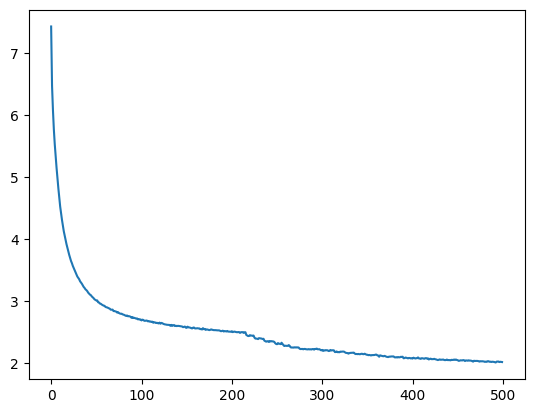

In [175]:
plt.plot(epoch_loss_avg)

In [176]:
input_data = []
for i in range(vocabulary_size):
    input_data.append(i)

In [177]:
input_data = torch.tensor(input_data)

In [178]:
import torch
import torch.nn as nn

# Assume you have a model called `my_model` with an embedding layer
embedding_layer = Transformer_Encoder.embedding  # Get the embedding layer

# Create a sample input data
#input_data = torch.tensor([1, 2, 3, 4, 5])  # example input data

# Pass the input data through the embedding layer
embeddings = embedding_layer(input_data.to(device))

# Now you have the embeddings for the input data
print(embeddings)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 2.2146e-01,  4.3540e-03, -6.7103e-02,  ..., -3.3140e-02,
          1.0266e-01, -1.4793e+00],
        [-1.3139e+00,  1.2410e+00,  1.9952e+00,  ..., -2.1376e-01,
          1.4661e+00, -3.0660e+00],
        ...,
        [ 3.6712e-01, -2.7533e+00,  2.0026e+00,  ...,  2.5196e+00,
          2.8838e+00,  1.8599e+00],
        [-1.3025e+00,  9.6498e-01, -3.8873e+00,  ..., -6.8266e-01,
          3.5328e+00,  7.0109e+00],
        [-1.9970e+00,  1.8410e+00, -1.9530e+00,  ...,  5.9485e-01,
         -8.7591e-02,  1.0373e+00]], device='cuda:0',
       grad_fn=<EmbeddingBackward0>)


In [179]:
!pip install hdbscan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan


embeddings = embeddings.cpu()
# Загрузка эмбеддингов слов
#embeddings = embeddings_np
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=3, perplexity=3)
embeddings_tsne = tsne.fit_transform(embeddings_np)



# Кластеризация с помощью HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=6)
clusters = clusterer.fit_predict(embeddings_tsne)

# Визуализация результатов
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=clusters)
plt.colorbar()
plt.show()

In [ ]:
# Получение меток классов
labels = clusterer.labels_

# Создание словаря для сопоставления слов и меток классов
word_clusters = dict(zip(vocabulary, labels))

In [ ]:
word_clusters

In [ ]:
# Создание DataFrame из словаря
df = pd.DataFrame(list(word_clusters.items()), columns=['Слово', 'Метка'])

# Запись DataFrame в Excel
df.to_excel('/content/word_clusters.xlsx', index=False)

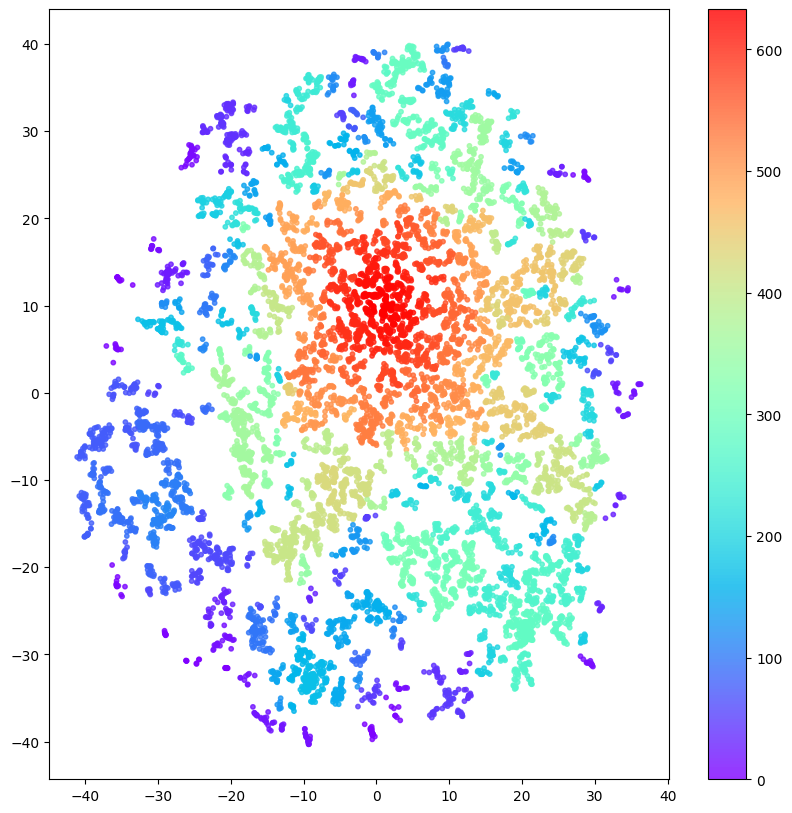

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import hdbscan

embeddings = embeddings.cpu()
# Преобразование тензора embeddings в массив numpy
embeddings_np = embeddings.detach().numpy()

# Сокращение размерности с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)
embeddings_tsne = tsne.fit_transform(embeddings_np)

# Кластеризация с помощью HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=7)
clusters = clusterer.fit_predict(embeddings_tsne)

# Поиск индексов элементов, относящихся к кластеру -1
indices_to_keep = np.where(clusters != -1)[0]

# Фильтрация embeddings_tsne, оставляем только элементы, не относящиеся к кластеру -1
filtered_embeddings_tsne = embeddings_tsne[indices_to_keep]

# Визуализация результатов
plt.figure(figsize=(10, 10))
plt.scatter(filtered_embeddings_tsne[:, 0], filtered_embeddings_tsne[:, 1], c=clusters[indices_to_keep], cmap='rainbow', s=10, alpha=0.8)
plt.colorbar()
plt.show()